In [1]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

In [2]:
chat = ChatOpenAI(temperature=0.1, openai_api_key=api_key)

chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

AIMessage(content='You could try a caprese salad with fresh tomatoes, mozzarella cheese, and basil.', additional_kwargs={}, example=False)

In [9]:
from langchain.schema import Document
import os

In [4]:
Document(page_content="This is my document. It is full of text that I've gathered from other places",
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })

Document(page_content="This is my document. It is full of text that I've gathered from other places", metadata={'my_document_id': 234234, 'my_document_source': 'The LangChain Papers', 'my_document_create_time': 1680013019})

In [6]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key = api_key)

In [7]:
test_vector = "There's nothing like a beach day in Florida"
text_embedding = embeddings.embed_query(test_vector)
print( f'Your embedding is length {len(text_embedding)}')

Your embedding is length 1536


In [10]:
folder_path = 'Transcripts'
transcripts = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            text = file.read()
            transcripts.append(text)

Document(page_content=transcripts[0])

Document(page_content='Yeah So, you know, of course, the US is going to investigate something like this and weâ€™ll get into there were a couple of pretty deep well, as deep as you can get in this case, investigations. But the very first thing that happened was the FBI was like, hey, this is some sort of acoustic attack, some sort of sound waves are being used. Letâ€™s get in there and at least check out the locations, check out everything around where these people are living, where theyâ€™re staying. And they found nothing. They came up really pretty much empty. And we should also point out this is I think if you Canadian diplomat still wasnâ€™t entirely U.S., right.\n\nBut for the most part, it was U.S. and it seemed to be it seemed to be concentrated in the homes of the diplomats and by diplomats were including CIA agents who werenâ€™t known who they werenâ€™t like, hey, Iâ€™m the CIA agent here. They were they were posing as diplomats. So the diplomats there, Michael Keaton, well, 

In [34]:
sysk_embedding = embeddings.embed_documents(transcripts, chunk_size= 100)

In [35]:
len(sysk_embedding)

3

In [18]:
import numpy as np

In [36]:
rel = [(0,1), (1,2), (2,0)]

for i in rel:
    x, y = i 
    vec1 = np.array(sysk_embedding[x])
    vec2 = np.array(sysk_embedding[y])

    euc_distance = np.linalg.norm(vec1 - vec2)
    print(f'Euclidian distance between {x} and {y}: {round(euc_distance, 3)}')

Euclidian distance between 0 and 1: 0.678
Euclidian distance between 1 and 2: 0.736
Euclidian distance between 2 and 0: 0.714


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
rel = [(0,1), (1,2), (2,0)]

for i in rel:
    x, y = i 
    vec1 = np.array(sysk_embedding[x]).reshape(1, -1)
    vec2 = np.array(sysk_embedding[y]).reshape(1, -1)

    cos_sim = cosine_similarity(vec1,vec2)
    print(f'Cosine Similarity between {x} and {y}: {cos_sim}')

Cosine Similarity between 0 and 1: [[0.77012757]]
Cosine Similarity between 1 and 2: [[0.72911695]]
Cosine Similarity between 2 and 0: [[0.74538862]]


In [45]:
strs = ['I need to buy groceries', 'I have to go shopping for food', 'The cat is sleeping on the couch']

In [46]:
vecs = []

for s in strs:
    vecs.append(embeddings.embed_query(s))

print(vecs[0])

[-0.002553066937252879, -0.003293675137683749, -0.011112247593700886, -0.009956023655831814, -0.02699938602745533, 0.009193540550768375, -0.009699779562652111, -0.013024703599512577, 0.020412035286426544, -0.02657439559698105, 0.008462307043373585, 0.0017077736556529999, -0.005865491461008787, -0.013712188228964806, 0.006637348793447018, 0.005981113761663437, 0.03487420827150345, -0.0011601299047470093, 0.012649712152779102, -0.03607418015599251, -0.00430302694439888, -0.00023866644187364727, 0.03369923308491707, -0.0013265323359519243, 0.010856002569198608, -0.008124815300107002, 0.011693484149873257, -0.007218585815280676, -0.00935603678226471, -0.004987386520951986, 0.026899388059973717, -0.017437104135751724, -0.00160465098451823, -0.02253698743879795, 0.007737324107438326, -0.012218471616506577, 0.01603713445365429, 0.006131110712885857, -0.005346753168851137, -0.016387127339839935, 0.0036811663303524256, 0.014987158589065075, 0.014924660325050354, 0.005434251390397549, -0.0096997

In [48]:
rel = [(0,1), (1,2), (2,0)]

for i in rel:
    x, y = i 
    vec1 = np.array(vecs[x]).reshape(1, -1)
    vec2 = np.array(vecs[y]).reshape(1, -1)

    cos_sim = cosine_similarity(vec1,vec2)
    print(f'Cosine Similarity between {x} and {y}: {cos_sim}')

for i in rel:
    x, y = i 
    vec1 = np.array(vecs[x])
    vec2 = np.array(vecs[y])

    euc_distance = np.linalg.norm(vec1 - vec2)
    print(f'Euclidian distance between {x} and {y}: {round(euc_distance, 3)}')

Cosine Similarity between 0 and 1: [[0.95183237]]
Cosine Similarity between 1 and 2: [[0.75656874]]
Cosine Similarity between 2 and 0: [[0.75529571]]
Euclidian distance between 0 and 1: 0.31
Euclidian distance between 1 and 2: 0.698
Euclidian distance between 2 and 0: 0.7


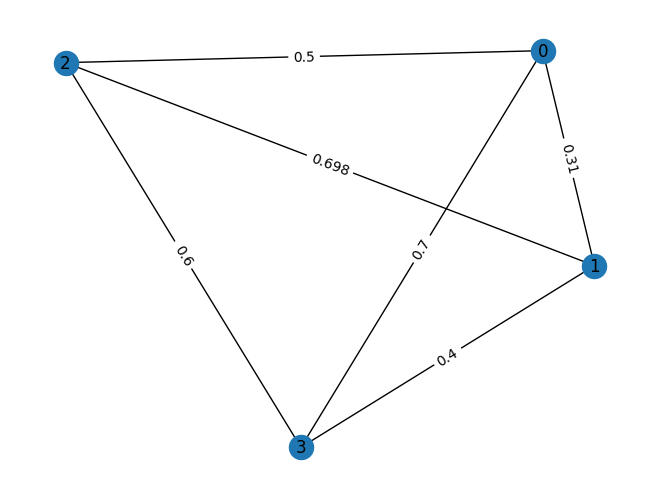

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

points = list(range(4))
distances = [(0, 1, 0.31), (0, 2, 0.5), (0, 3, 0.7), (1, 2, 0.698), (1, 3, 0.4), (2, 3, 0.6)]
labels = {i: f'{i}' for i in points}

G = nx.Graph()
G.add_nodes_from(points)
G.add_weighted_edges_from(distances)

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

